In [1]:
# 참고 : https://github.com/yojulab/learn_data_analytics/wiki/10.3--CDA
# 참고(scipy api) : https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import scipy.stats as stats

In [3]:
df_TOCC=pd.read_csv("../../datasets/UsingChart_TypeOfContractChannel.csv")
df_TOCC[:3]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


###  y:연속형 : 단일 변수에 대한 정규성 여부 판단
- 검증 갯수 따른 방법 선택
    - 5천개 이하 : shapiro normality test
    - 5천개 이상 : Anderson normality test

#### 선정 변수 age
- 분석 내용 : 나이가 정규 분포를 따르는가?
    - 귀무가설 : 나이가 정규 분포이다.
    - 대립가설 : 나이가 정규 분포가 아니다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 81.5 > 0.78(p-value 0.05)므로 대립가설이 참.
    - 사실 결론 : 나이가 정규 분포가 아니다.

In [4]:
df_age = df_TOCC['age']

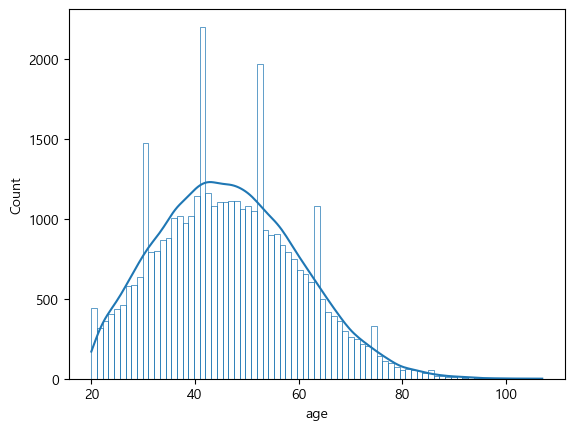

In [29]:
sns.histplot(data=df_TOCC, x='age', kde=True, fill=False)
plt.show()

In [20]:
df_age = df_TOCC['age'].dropna()

In [27]:
## s < cv : 정규분포, s > cv : 비정규분포
s, cv , sl = stats.anderson(df_age)
s, cv , sl # 81.55 > 0.78 : 비정규분포

(81.5597210112901,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수 : Mileage[:200]
- 분석 내용 : 마일리지가 정규 분포를 따르는가?
    - 귀무가설 : 마일리지가 정규 분포이다.
    - 대립가설 : 마일리지가 정규 분포가 아니다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설이 참.
    - 사실 결론 : 마일리지가 정규 분포가 아니다. (statistic=0.984769, pvalue=0.029488)

In [33]:
df_TOCC_dropna = df_TOCC.dropna()[:200]
df_TOCC_dropna[:3]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


<Axes: xlabel='Mileage', ylabel='Count'>

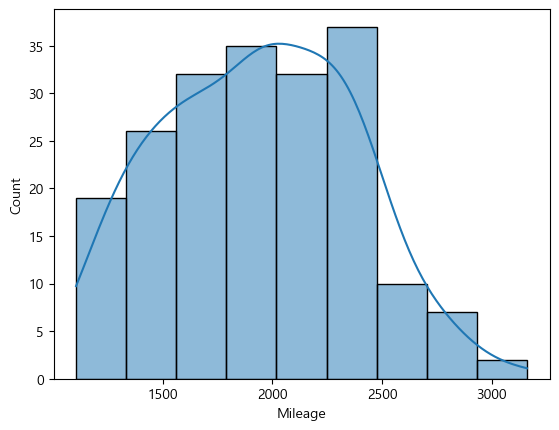

In [35]:
sns.histplot(data=df_TOCC_dropna, x='Mileage', kde=True)

In [36]:
stats.shapiro(df_TOCC_dropna['Mileage'])

ShapiroResult(statistic=0.9847697019577026, pvalue=0.029488753527402878)

#### 선정 변수 age, Mileage
- 분석 내용 : 나이에 따라서 마일리지 변화가 있는가?
    - 귀무가설 : 나이에 따라서 마일리지 변화가 없다.
    - 대립가설 : 나이에 따라서 마일리지 변화가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설 참.
    - 사실 결론 : 나이에 따라서 마일리지가 올라간다. (statistic=0.973, pvalue=0.0)

In [9]:
# df_TOCC[['age', 'Mileage']].describe()
df_age_Mileage = df_TOCC[['age', 'Mileage']]
df_age_Mileage[:3]

,age,Mileage
0,43.0,1862.0
1,62.0,2532.0
2,60.0,2363.0


In [16]:
df_age_Mileage.isnull().sum()

age        0
Mileage    0
dtype: int64

In [13]:
df_age_Mileage = df_age_Mileage.dropna().copy()

In [14]:
df_age_Mileage.corr()

,age,Mileage
age,1.000000,0.973281
Mileage,0.973281,1.000000


In [17]:
stats.pearsonr(df_age_Mileage['age'],df_age_Mileage['Mileage'])

PearsonRResult(statistic=0.9732809346109912, pvalue=0.0)

In [18]:
stats.pearsonr(df_age_Mileage['Mileage'], df_age_Mileage['age'])

PearsonRResult(statistic=0.9732809346109912, pvalue=0.0)

#### 선정 변수 : type_of_contract, cancellation
- 분석 내용 : 계약유형에 따라 해약여부가 달라지는가?
    - 귀무가설 : 계약유형에 따라 해약여부가 달라지지 않는다.
    - 대립가설 : 계약유형에 따라 해약여부가 달라진다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설 참, 
    - 사실 결론 : 계약유형에 따라 해약여부가 달라진다.

In [4]:
df_TOCC[['type_of_contract', 'cancellation']].describe()

,type_of_contract,cancellation
count,51300,51279
unique,2,2
top,렌탈,정상
freq,46481,50372


In [5]:
df_TOCC_category = df_TOCC[['type_of_contract', 'cancellation']]

In [6]:
df_TOCC_category_pivot = pd.pivot_table(data=df_TOCC_category, index='type_of_contract', columns='cancellation', aggfunc=len)
df_TOCC_category_pivot

cancellation,정상,해약
type_of_contract,,
렌탈,46137,344
멤버십,4231,563


In [7]:
import scipy 
scipy.__version__
import scipy.stats as stats

In [8]:
stats.chi2_contingency(observed=df_TOCC_category_pivot, correction=True)

Chi2ContingencyResult(statistic=3021.9735309482894, pvalue=0.0, dof=1, expected_freq=array([[45658.8007411,   822.1992589],
       [ 4709.1992589,    84.8007411]]))

In [11]:
df_TOCC[['state', 'cancellation']].describe()

,state,cancellation
count,51304,51279
unique,4,2
top,계약확정,정상
freq,50350,50372


#### 선정 변수 : product, cancellation
- 분석 내용 : 차종에 따라 해약여부가 달라지는가?
    - 귀무가설 : 차종에 따라 해약여부가 달라지지 않는다.
    - 대립가설 : 차종에 따라 해약여부가 달라진다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설 참
    - 사실 결론 : 차종에 따라 해약여부가 달라진다.

In [17]:
# 다른변수이름 작성 시 copy() 사용
df_TOCC_product = df_TOCC[['product', 'cancellation']].dropna().copy()
# df_TOCC_product[:3]
df_TOCC_product.describe()

,product,cancellation
count,51278,51278
unique,6,2
top,K1,정상
freq,39111,50371


In [29]:
df_TOCC_product_pivot = pd.pivot_table(data=df_TOCC_product, index='product'
                                       , columns='cancellation', aggfunc=len).copy()
# df_TOCC_product_pivot

In [30]:
## product 기준
stats.chi2_contingency(observed=df_TOCC_product_pivot, correction=True)

Chi2ContingencyResult(statistic=103.79474317337241, pvalue=8.372028115481391e-21, dof=5, expected_freq=array([[3.84192086e+04, 6.91791353e+02],
       [8.83393274e+03, 1.59067261e+02],
       [2.04517380e+03, 3.68262023e+01],
       [3.21216058e+02, 5.78394243e+00],
       [6.33591306e+02, 1.14086938e+01],
       [1.17877452e+02, 2.12254768e+00]]))

In [28]:
## correction 기준
stats.chi2_contingency(observed=df_TOCC_product_pivot, correction=True)

Chi2ContingencyResult(statistic=103.79474317337241, pvalue=8.372028115481391e-21, dof=5, expected_freq=array([[3.84192086e+04, 8.83393274e+03, 2.04517380e+03, 3.21216058e+02,
        6.33591306e+02, 1.17877452e+02],
       [6.91791353e+02, 1.59067261e+02, 3.68262023e+01, 5.78394243e+00,
        1.14086938e+01, 2.12254768e+00]]))

#### 선정 변수 : state, cancellation
- 이런 변수 구성은 참조되지 않는다.

In [24]:
# error with Non
df_TOCC_error = df_TOCC[['state', 'cancellation']].dropna().copy()
# df_TOCC_error[:3]
df_TOCC_error.describe()

,state,cancellation
count,51279,51279
unique,4,2
top,계약확정,정상
freq,50326,50372


In [25]:
df_TOCC_error_pivot = pd.pivot_table(data=df_TOCC_error, index='state'
               , columns='cancellation', aggfunc=len)
df_TOCC_error_pivot

cancellation,정상,해약
state,,
계약확정,50326.0,NaN
기간만료,32.0,NaN
해약진행중,14.0,NaN
해약확정,NaN,907.0


In [26]:
stats.chi2_contingency(observed=df_TOCC_error_pivot, correction=True)

Chi2ContingencyResult(statistic=nan, pvalue=nan, dof=3, expected_freq=array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]]))